In [222]:
#Importing the libraries for this project
# artificial neural network called Long Short Term Memory to predict the future price of stock.
import math
import sklearn
import tensorflow 
import matplotlib
import keras
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

plt.style.use('fivethirtyeight')

In [223]:
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


pandas_datareader 0.9.0
numpy 1.19.2
pandas 1.1.3
sklearn 0.23.2
tensorflow 2.4.0
keras 2.4.3
matplotlib 3.3.2
pip 20.2.4


In [224]:
df= web.DataReader('VERU',data_source='yahoo',start='2016-01-01', end='2020-12-21')
#Getting the data for VERU, and showing it
df

High   Low   Open  Close    Volume  Adj Close
Date                                                      
2016-01-04   1.51  1.39   1.41   1.45     77400       1.45
2016-01-05   1.48  1.41   1.46   1.43     34900       1.43
2016-01-06   1.45  1.33   1.45   1.36    162800       1.36
2016-01-07   1.37  1.26   1.34   1.27    115500       1.27
2016-01-08   1.35  1.22   1.27   1.24     93900       1.24
...           ...   ...    ...    ...       ...        ...
2020-12-15  11.45  8.84  11.40   9.33  65282800       9.33
2020-12-16  11.16  9.33   9.66   9.99  45957300       9.99
2020-12-17  10.02  9.02   9.93   9.30  11618500       9.30
2020-12-18   9.23  8.61   8.98   8.81   7793500       8.81
2020-12-21   9.13  8.33   8.40   8.86   4772100       8.86

[1252 rows x 6 columns]

In [225]:
# get the amount of rows, and columns.
df.shape
#The data have 1254 rows, and 6 colums

(1252, 6)

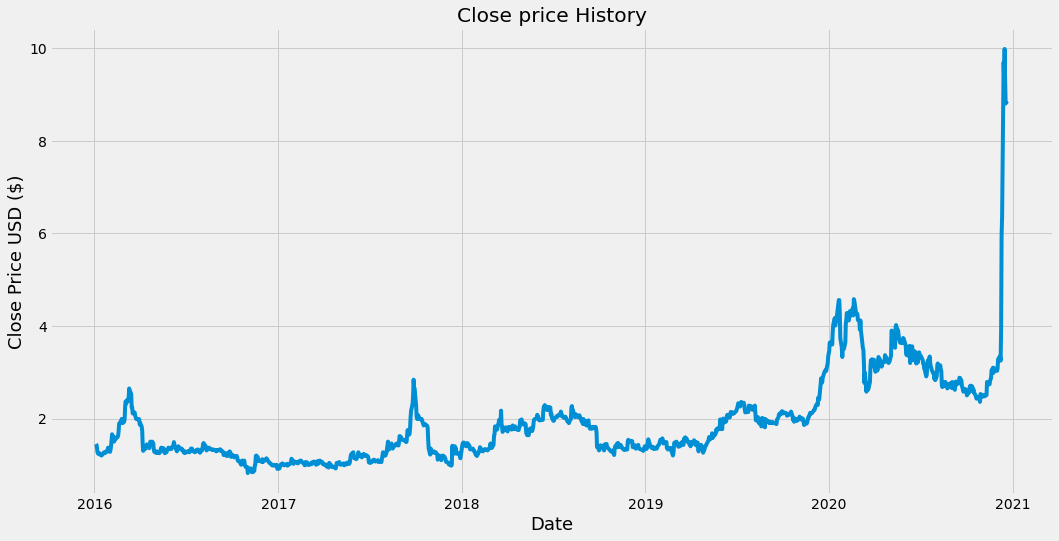

In [226]:
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()
#Creating a graph 

In [227]:
# Created a new dataframe with only the closing column
data = df.filter(['Close'])
#Getting the values from data and converting it to a numpy array
dataset= data.values
#Getting the number of rows to train the model 
training_data_len=math.ceil(len(dataset)*.9)
training_data_len


1127

In [228]:
# Scaling the data/ we must apply pre-processing because its always advantageous.
#pre-processing transformations scaling or normalization the input data before it is presented 
#to a neural network.
#Its usually help the model... USUALLY

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0687023 ],
       [0.06652126],
       [0.05888768],
       ...,
       [0.92475468],
       [0.87131959],
       [0.87677207]])

In [229]:
#Creating the training dataset 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Spliting the data into x and y data sets
x_train =[]
y_train =[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    #Zero to 59
    y_train.append(train_data[i,0])
    # 61 values which will be in the positions 60
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0687023 , 0.06652126, 0.05888768, 0.04907306, 0.04580153,
       0.04689204, 0.04471102, 0.04253   , 0.04253   , 0.04143948,
       0.04689204, 0.04907306, 0.04907306, 0.04689204, 0.05125409,
       0.05125409, 0.05452563, 0.05997819, 0.05125409, 0.05016358,
       0.05561615, 0.06434024, 0.07742639, 0.09160305, 0.08178845,
       0.07415486, 0.0785169 , 0.08396947, 0.08069792, 0.08505998,
       0.08833152, 0.09814613, 0.11668484, 0.12104689, 0.11886587,
       0.12758997, 0.12322793, 0.11777536, 0.12104689, 0.12868048,
       0.15703381, 0.16902944, 0.16357688, 0.17339151, 0.17011997,
       0.17993458, 0.19956381, 0.19520174, 0.18647765, 0.15485279,
       0.15485279, 0.14067611, 0.14067611, 0.14285716, 0.13522355,
       0.13086151, 0.12758997, 0.12649946, 0.12758997, 0.12649946])]
[0.11450382086257127]

[array([0.0687023 , 0.06652126, 0.05888768, 0.04907306, 0.04580153,
       0.04689204, 0.04471102, 0.04253   , 0.04253   , 0.04143948,
       0.04689204, 0.04907306, 0.04

In [153]:
#Covert the t_train and y _train to numpy arrays 
x_train, y_train = np.array(x_train),np.array(y_train)

In [154]:
# Reshaping the data to get it to becoming 3-dimensional 
#since lsdm network expect a 3-dimensional dataset
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1067, 60, 1)

In [155]:
#LSTM MODEL
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [156]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')
# optimizer improve the loss fuctions, and the loss fuctions show how well the model is doing


In [157]:
#train the model
model.fit(x_train,y_train, batch_size=1,epochs=1)


1067/1067 [==============================] - 46s 38ms/step - loss: 0.0012


In [158]:
#creating the testing data set by making a new array that contian the scaled values from the index 1069
test_data = scaled_data[training_data_len-60:,:]
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [159]:
#Covert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.26717558, 0.24863686, 0.24645583, ..., 0.28462379, 0.25845149,
        0.28244277],
       [0.24863686, 0.24645583, 0.23882225, ..., 0.25845149, 0.28244277,
        0.28353328],
       [0.24645583, 0.23882225, 0.25081788, ..., 0.28244277, 0.28353328,
        0.26063251],
       ...,
       [0.20174483, 0.19738279, 0.1919302 , ..., 0.96837514, 0.92802619,
        1.        ],
       [0.19738279, 0.1919302 , 0.1984733 , ..., 0.92802619, 1.        ,
        0.92475468],
       [0.1919302 , 0.1984733 , 0.19302072, ..., 1.        , 0.92475468,
        0.87131959]])

In [160]:
#Reshaping the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.26717558],
        [0.24863686],
        [0.24645583],
        ...,
        [0.28462379],
        [0.25845149],
        [0.28244277]],

       [[0.24863686],
        [0.24645583],
        [0.23882225],
        ...,
        [0.25845149],
        [0.28244277],
        [0.28353328]],

       [[0.24645583],
        [0.23882225],
        [0.25081788],
        ...,
        [0.28244277],
        [0.28353328],
        [0.26063251]],

       ...,

       [[0.20174483],
        [0.19738279],
        [0.1919302 ],
        ...,
        [0.96837514],
        [0.92802619],
        [1.        ]],

       [[0.19738279],
        [0.1919302 ],
        [0.1984733 ],
        ...,
        [0.92802619],
        [1.        ],
        [0.92475468]],

       [[0.1919302 ],
        [0.1984733 ],
        [0.19302072],
        ...,
        [1.        ],
        [0.92475468],
        [0.87131959]]])

In [161]:
#Get the model predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [162]:
#Get the root mean squared error RMSE
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

0.8042214486270874

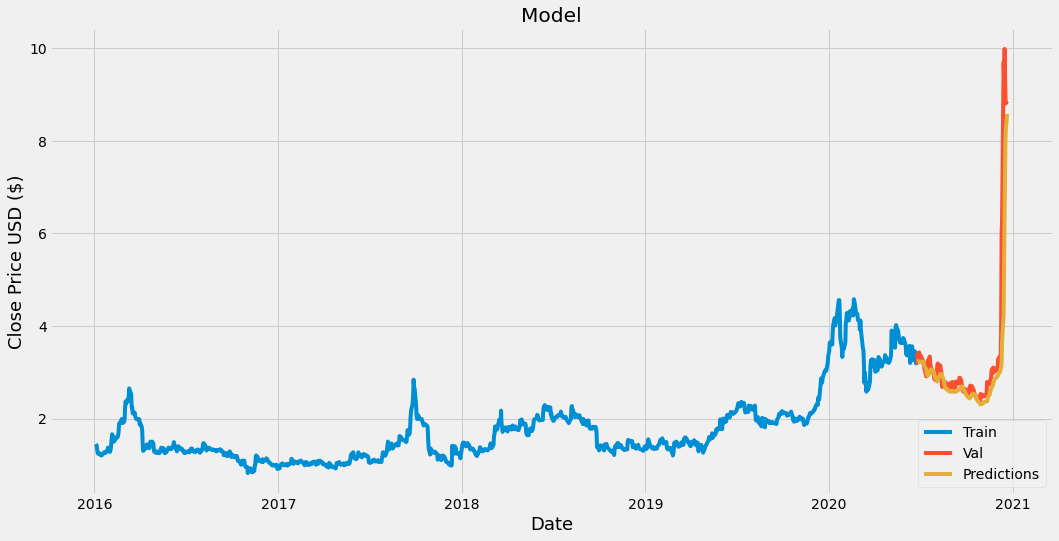

In [163]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:].copy()
valid['Predictions'] = predictions 
#Visulatziation of the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc="lower right")
plt.show()

In [164]:
#show the valid and the predicted prices 
valid

Close  Predictions
Date                          
2020-06-25   3.42     3.235239
2020-06-26   3.21     3.242594
2020-06-29   3.43     3.224072
2020-06-30   3.34     3.227553
2020-07-01   3.36     3.227976
...           ...          ...
2020-12-15   9.33     5.347454
2020-12-16   9.99     6.446591
2020-12-17   9.30     7.476451
2020-12-18   8.81     8.196893
2020-12-21   8.86     8.583275

[125 rows x 2 columns]

In [169]:
#Lets predict the price for jan
veru_qutoes= web.DataReader('VERU',data_source='yahoo',start='2016-01-01', end='2020-12-18')
# New df
new_df = veru_qutoes.filter(['Close'])
#Getting the last 60 days closing price
last_60_days = new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convering to numpay, and 3d for the LSTM
X_test= np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_prices= model.predict(X_test)
#undo the scaling
pred_prices = scaler.inverse_transform(pred_prices)
print(pred_prices)

[[8.583275]]


In [170]:
veru_qutoes2= web.DataReader('VERU',data_source='yahoo',start='2016-01-01', end='2020-12-21')
print(veru_qutoes2['Close'])

Date
2016-01-04    1.45
2016-01-05    1.43
2016-01-06    1.36
2016-01-07    1.27
2016-01-08    1.24
              ... 
2020-12-15    9.33
2020-12-16    9.99
2020-12-17    9.30
2020-12-18    8.81
2020-12-21    8.86
Name: Close, Length: 1252, dtype: float64
